In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
sns.set(style="whitegrid")

In [6]:
df = pd.read_csv("insurance_claim_anomaly_50000.csv")

In [7]:
df.head()

,claim_id,customer_age,policy_tenure_years,claim_amount,claim_duration_days,claim_type,anomaly
0,1,56,7.7,36558.00,41,Health,0
1,2,69,8.1,56228.93,25,Vehicle,0
2,3,46,10.6,77496.94,44,Property,0
3,4,32,7.9,74220.69,50,Vehicle,0
4,5,60,6.5,118726.18,47,Vehicle,0


In [8]:
df.shape

(50000, 7)

In [9]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['claim_id', 'customer_age', 'policy_tenure_years', 'claim_amount',
       'claim_duration_days', 'claim_type', 'anomaly'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             50000 non-null  int64  
 1   customer_age         50000 non-null  int64  
 2   policy_tenure_years  50000 non-null  float64
 3   claim_amount         50000 non-null  float64
 4   claim_duration_days  50000 non-null  int64  
 5   claim_type           50000 non-null  object 
 6   anomaly              50000 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 2.7+ MB


In [12]:
df.describe()

,claim_id,customer_age,policy_tenure_years,claim_amount,claim_duration_days,anomaly
count,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.00000,50000.000000
mean,25000.500000,48.538820,7.738284,8.198005e+04,34.27990,0.040000
std,14433.901067,17.879704,4.176287,7.278799e+04,31.36071,0.195961
min,1.000000,18.000000,0.500000,4.290500e+02,1.00000,0.000000
25%,12500.750000,33.000000,4.100000,4.092245e+04,16.00000,0.000000
50%,25000.500000,48.000000,7.700000,6.348623e+04,31.00000,0.000000
75%,37500.250000,64.000000,11.400000,1.014651e+05,46.00000,0.000000
max,50000.000000,79.000000,15.000000,1.733307e+06,354.00000,1.000000


In [13]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSummary:\n", df.describe())

Shape: (50000, 7)

Columns: ['claim_id', 'customer_age', 'policy_tenure_years', 'claim_amount', 'claim_duration_days', 'claim_type', 'anomaly']

Summary:
            claim_id  customer_age  policy_tenure_years  claim_amount  \
count  50000.000000  50000.000000         50000.000000  5.000000e+04   
mean   25000.500000     48.538820             7.738284  8.198005e+04   
std    14433.901067     17.879704             4.176287  7.278799e+04   
min        1.000000     18.000000             0.500000  4.290500e+02   
25%    12500.750000     33.000000             4.100000  4.092245e+04   
50%    25000.500000     48.000000             7.700000  6.348623e+04   
75%    37500.250000     64.000000            11.400000  1.014651e+05   
max    50000.000000     79.000000            15.000000  1.733307e+06   

       claim_duration_days       anomaly  
count          50000.00000  50000.000000  
mean              34.27990      0.040000  
std               31.36071      0.195961  
min                1.000

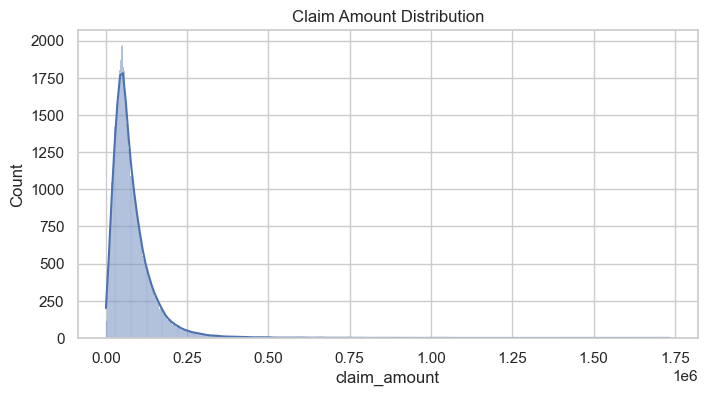

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(df["claim_amount"], kde=True)
plt.title("Claim Amount Distribution")
plt.show()


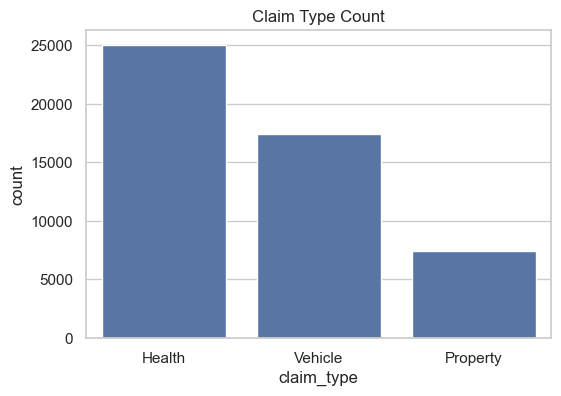

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["claim_type"])
plt.title("Claim Type Count")
plt.show()

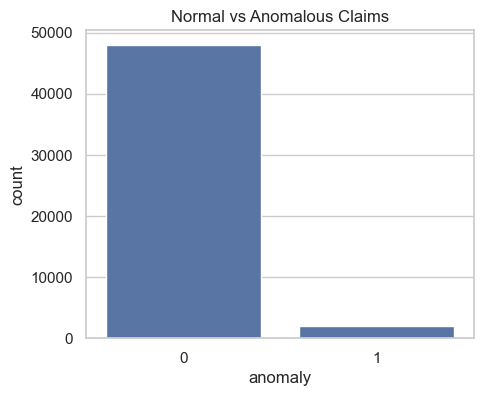

In [16]:
plt.figure(figsize=(5,4))
sns.countplot(x=df["anomaly"])
plt.title("Normal vs Anomalous Claims")
plt.show()

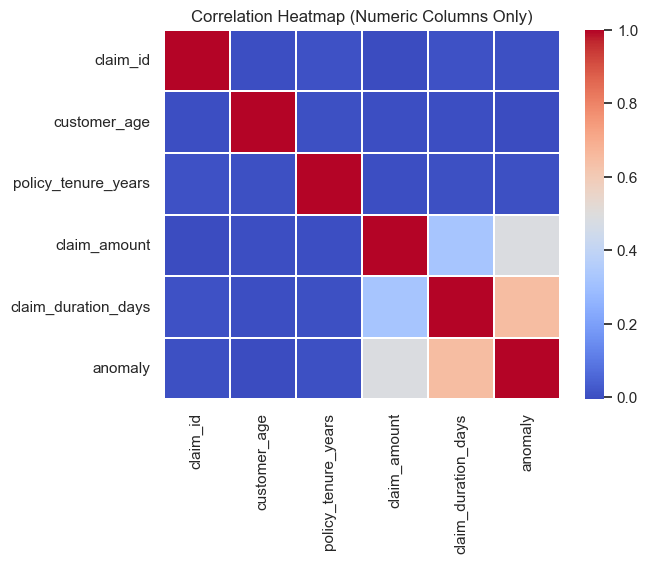

In [18]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), cmap="coolwarm", linewidths=0.3)
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


In [19]:
df_encoded = pd.get_dummies(df, columns=["claim_type"], drop_first=True)

In [20]:

X = df_encoded.drop("anomaly", axis=1)
y = df_encoded["anomaly"]

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
model = IsolationForest(contamination=0.04, random_state=42)
model.fit(X_scaled)

IsolationForest(contamination=0.04, random_state=42)

In [23]:
df_encoded["prediction"] = model.predict(X_scaled)
df_encoded["prediction"] = df_encoded["prediction"].apply(lambda x: 1 if x == -1 else 0)

In [24]:
print("\nConfusion Matrix:\n")
print(confusion_matrix(y, df_encoded["prediction"]))


Confusion Matrix:

[[47146   854]
 [  854  1146]]


In [25]:

print("\nClassification Report:\n")
print(classification_report(y, df_encoded["prediction"]))


Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     48000
           1       0.57      0.57      0.57      2000

    accuracy                           0.97     50000
   macro avg       0.78      0.78      0.78     50000
weighted avg       0.97      0.97      0.97     50000



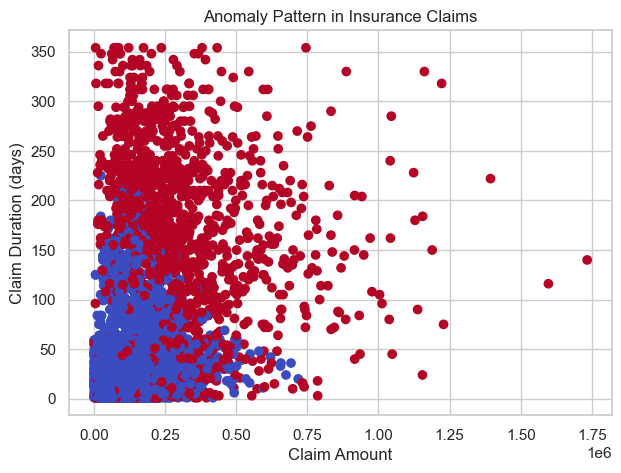

In [26]:
plt.figure(figsize=(7,5))
plt.scatter(df["claim_amount"], df["claim_duration_days"], c=df_encoded["prediction"], cmap="coolwarm")
plt.xlabel("Claim Amount")
plt.ylabel("Claim Duration (days)")
plt.title("Anomaly Pattern in Insurance Claims")
plt.show()

In [27]:
"""
Notes:
- Model works for fraud/anomaly detection in claims.
- Isolation Forest detects abnormal patterns in claim amount, duration, and type.
- Useful for insurance fraud investigation teams.
- Claims with high amount or unrealistic stay duration tend to be flagged.
"""

'\nNotes:\n- Model works for fraud/anomaly detection in claims.\n- Isolation Forest detects abnormal patterns in claim amount, duration, and type.\n- Useful for insurance fraud investigation teams.\n- Claims with high amount or unrealistic stay duration tend to be flagged.\n'